<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Sklearn_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sklearn Decision Trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##Fast Feature Engineering

In [9]:
df=df.dropna()

In [ ]:
df.isnull()

In [12]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [29]:
df["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [28]:
df=df.drop(index=df[df["sex"]=="."].index, axis=0)

In [31]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [32]:
y = df["species"]

In [35]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)

In [ ]:
X

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model = DecisionTreeClassifier()

In [43]:
model.fit(scaled_X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_preds = model.predict(scaled_X_test)

In [ ]:
y_preds

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        52
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.99       110
   macro avg       0.99      0.98      0.99       110
weighted avg       0.99      0.99      0.99       110



In [50]:
confusion_matrix(y_test,y_preds)

array([[52,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 38]])

##Feature Importances

In [51]:
model.feature_importances_

array([0.34477093, 0.08946206, 0.51957274, 0.00696266, 0.03923162,
       0.        , 0.        ])

In [53]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [54]:
len(model.feature_importances_), len(X_train.columns)

(7, 7)

In [57]:
pd.DataFrame(index=X_train.columns,columns=["importance"], data=model.feature_importances_ ).sort_values("importance", ascending=False)

,importance
flipper_length_mm,0.519573
culmen_length_mm,0.344771
culmen_depth_mm,0.089462
island_Dream,0.039232
body_mass_g,0.006963
island_Torgersen,0.000000
sex_MALE,0.000000


##plot_tree

In [58]:
from sklearn.tree import plot_tree

In [ ]:
plt.figure(figsize=(15,15), dpi=250)
plot_tree(model, feature_names=X.columns, filled=True);

##Test model Hyper-Parameters

In [124]:
def report_model(model):
  model.fit(scaled_X_train, y_train)
  y_preds = model.predict(scaled_X_test)
  print(classification_report(y_test,y_preds))
  plt.figure(figsize=(15,15), dpi=250)
  plot_tree(model, feature_names=X.columns, filled=True);


In [118]:
def plot_model(model, feature_indices=[0, 1]):
    # Use only the selected features for training and visualization
    reduced_X_train = scaled_X_train[:, feature_indices]
    reduced_X_test = scaled_X_test[:, feature_indices]

    model.fit(reduced_X_train, y_train)
    y_preds = model.predict(reduced_X_test)

    plt.figure(figsize=(15, 15), dpi=250)

    # Create a meshgrid for visualization
    x_min, x_max = reduced_X_train[:, 0].min() - 1, reduced_X_train[:, 0].max() + 1
    y_min, y_max = reduced_X_train[:, 1].min() - 1, reduced_X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    label_to_num = {label: index for index, label in enumerate(np.unique(y_train))}
    y_train_numeric = np.array([label_to_num[label] for label in y_train])

    perdz = np.array([label_to_num[label] for label in Z])
    perdz = perdz.reshape(xx.shape)


    plt.figure(figsize=(8, 8))  # New figure for decision boundary


    plt.contourf(xx, yy, perdz, alpha=0.4)

    plt.scatter(reduced_X_train[:, 0], reduced_X_train[:, 1], c=y_train_numeric, edgecolors='k', marker='o')
    plt.title('Decision Boundary for Decision Tree Classifier')
    plt.xlabel(f'Feature {feature_indices[0]}')
    plt.ylabel(f'Feature {feature_indices[1]}')
    plt.show()

<Figure size 3750x3750 with 0 Axes>

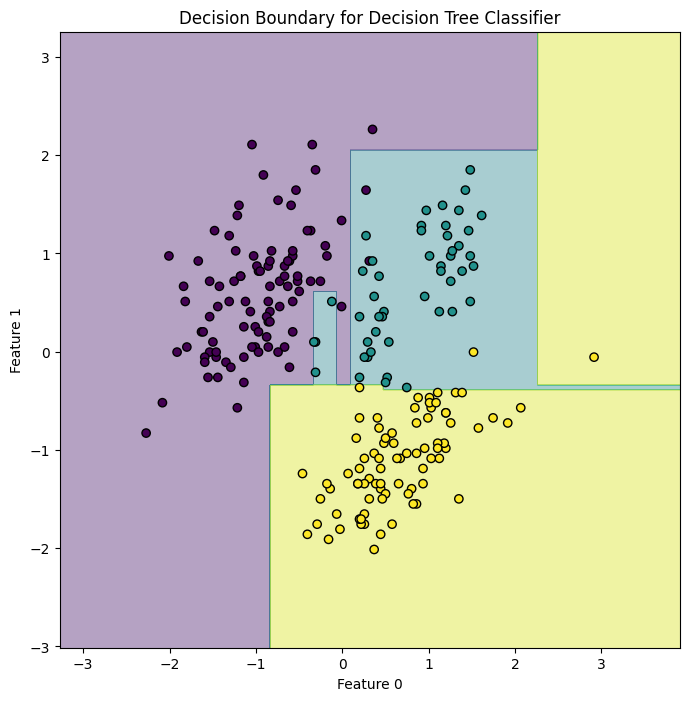

In [121]:
model = DecisionTreeClassifier( max_depth=5)
plot_model(model)

              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        52
   Chinstrap       1.00      0.90      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       110
   macro avg       0.99      0.97      0.98       110
weighted avg       0.98      0.98      0.98       110



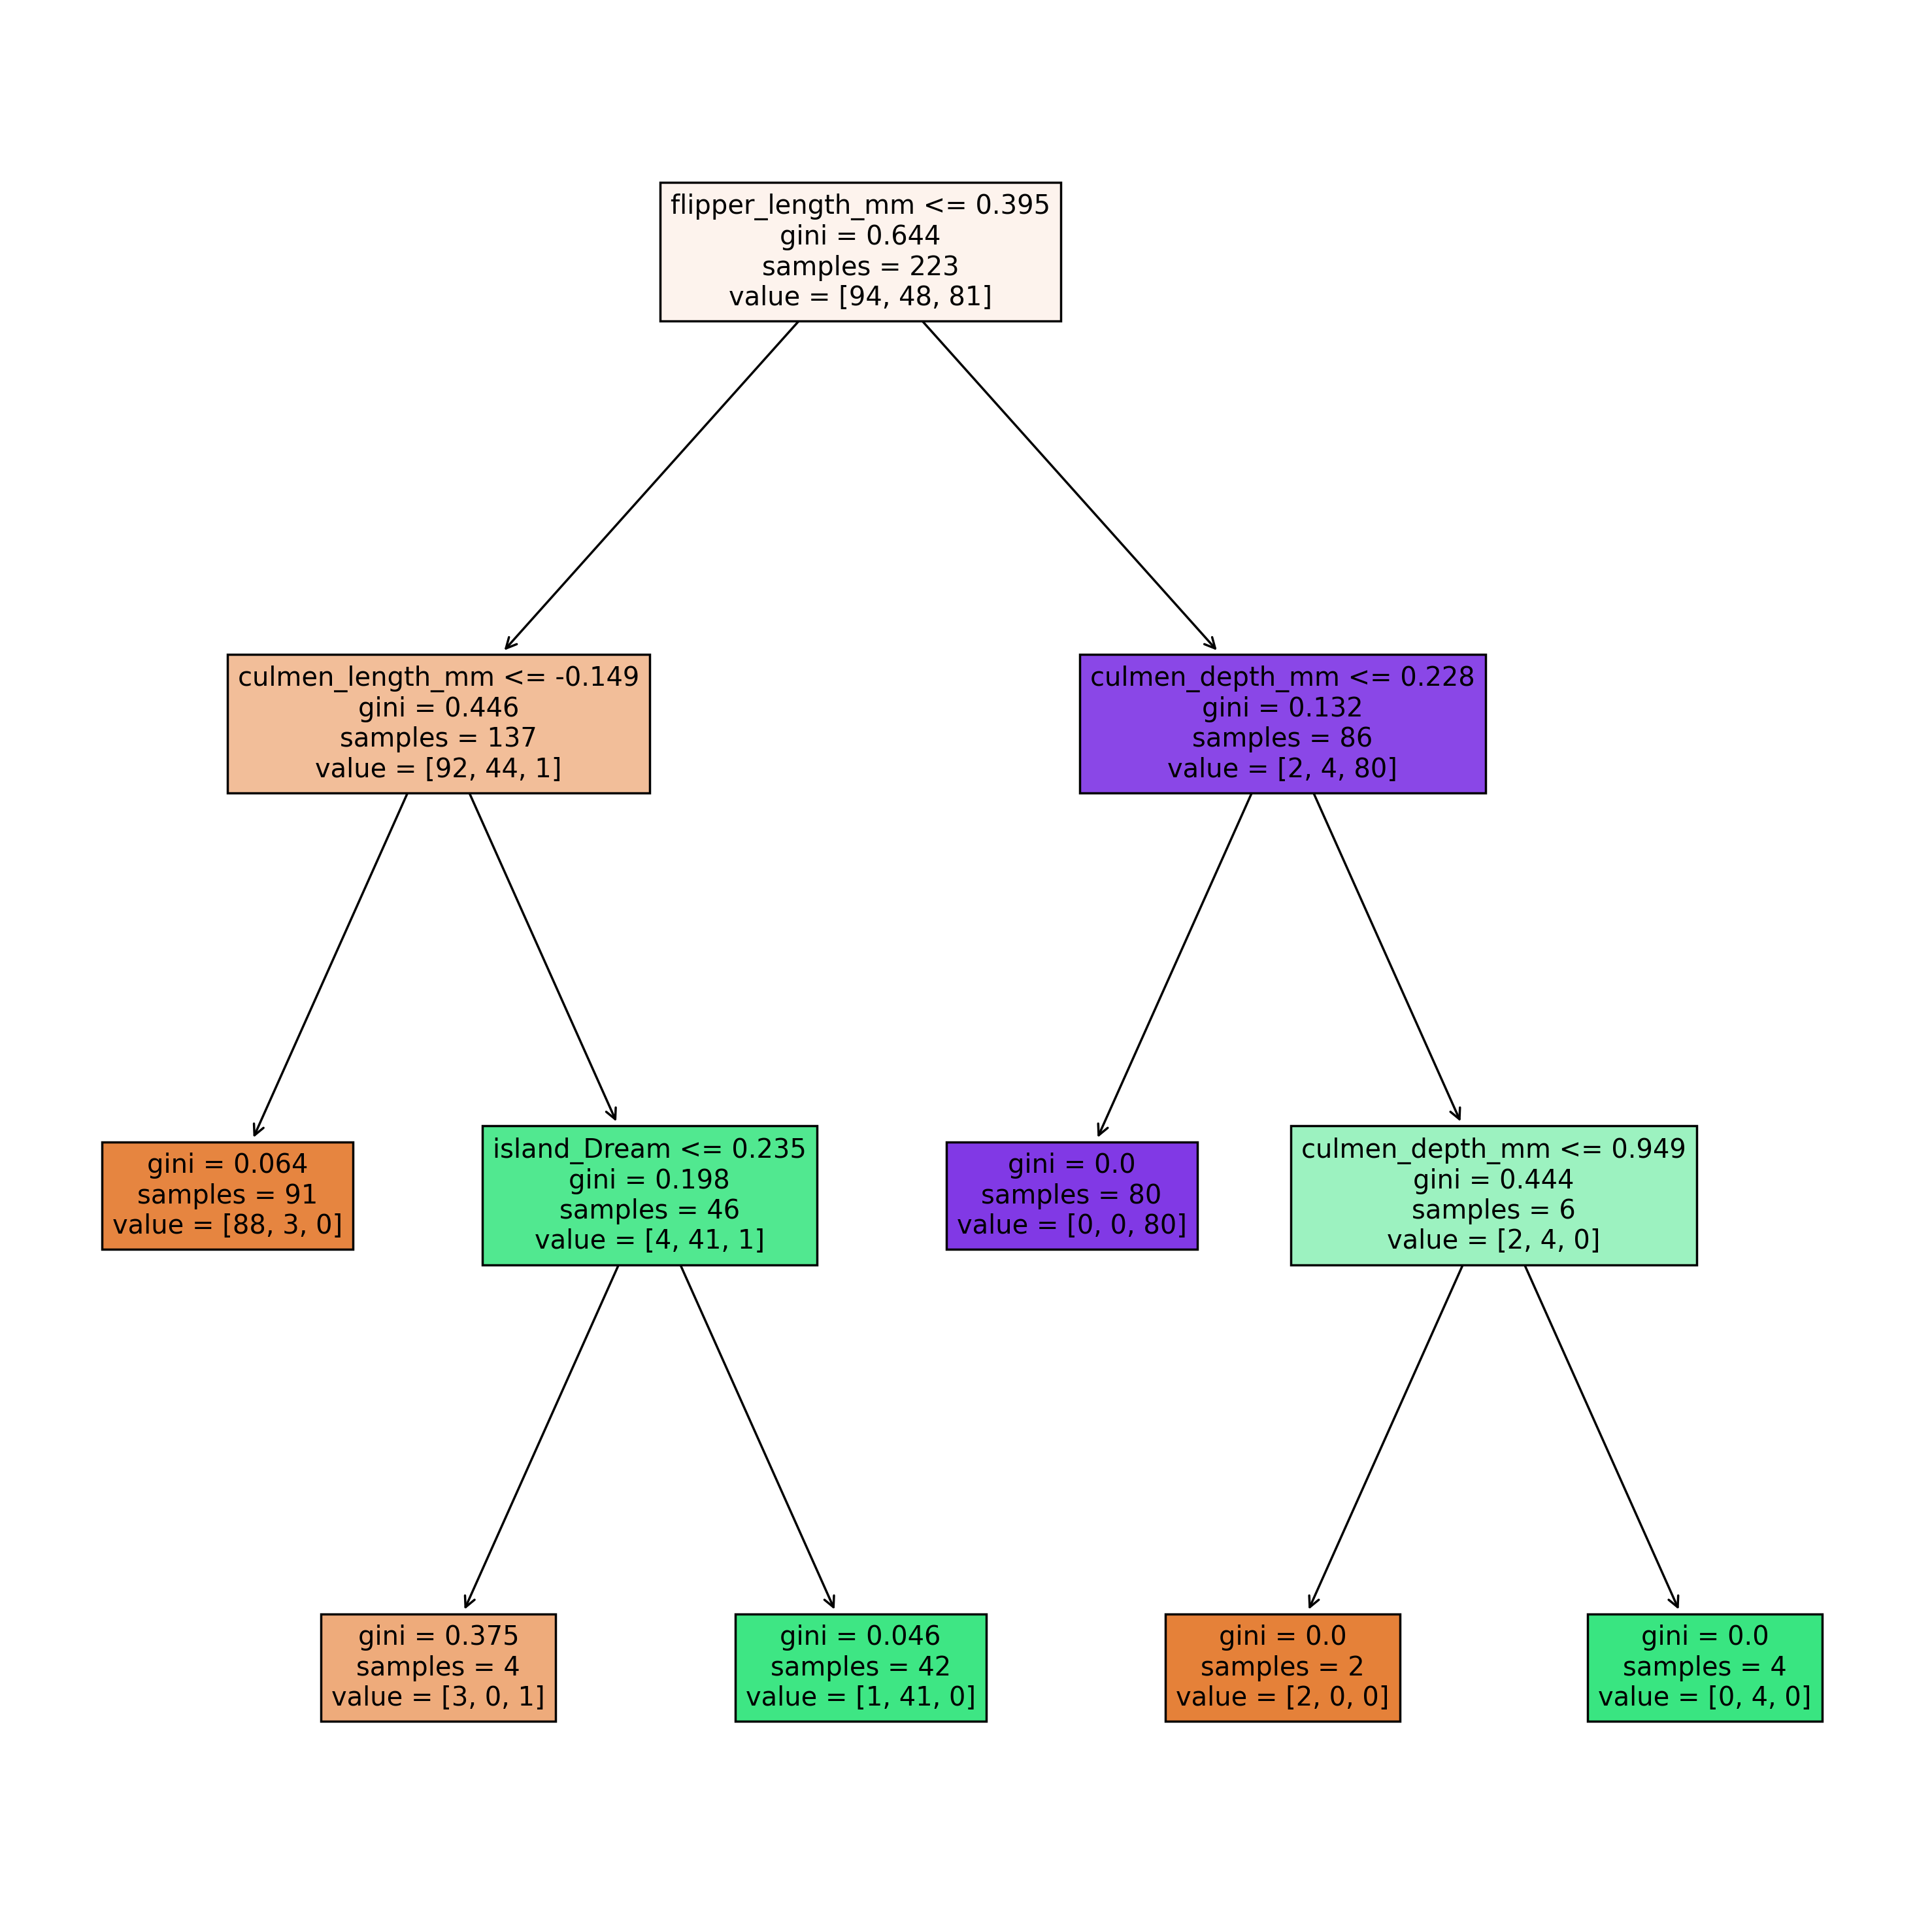

In [125]:
model = DecisionTreeClassifier( max_leaf_nodes=6)
report_model(model)

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        52
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      1.00      1.00        38

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



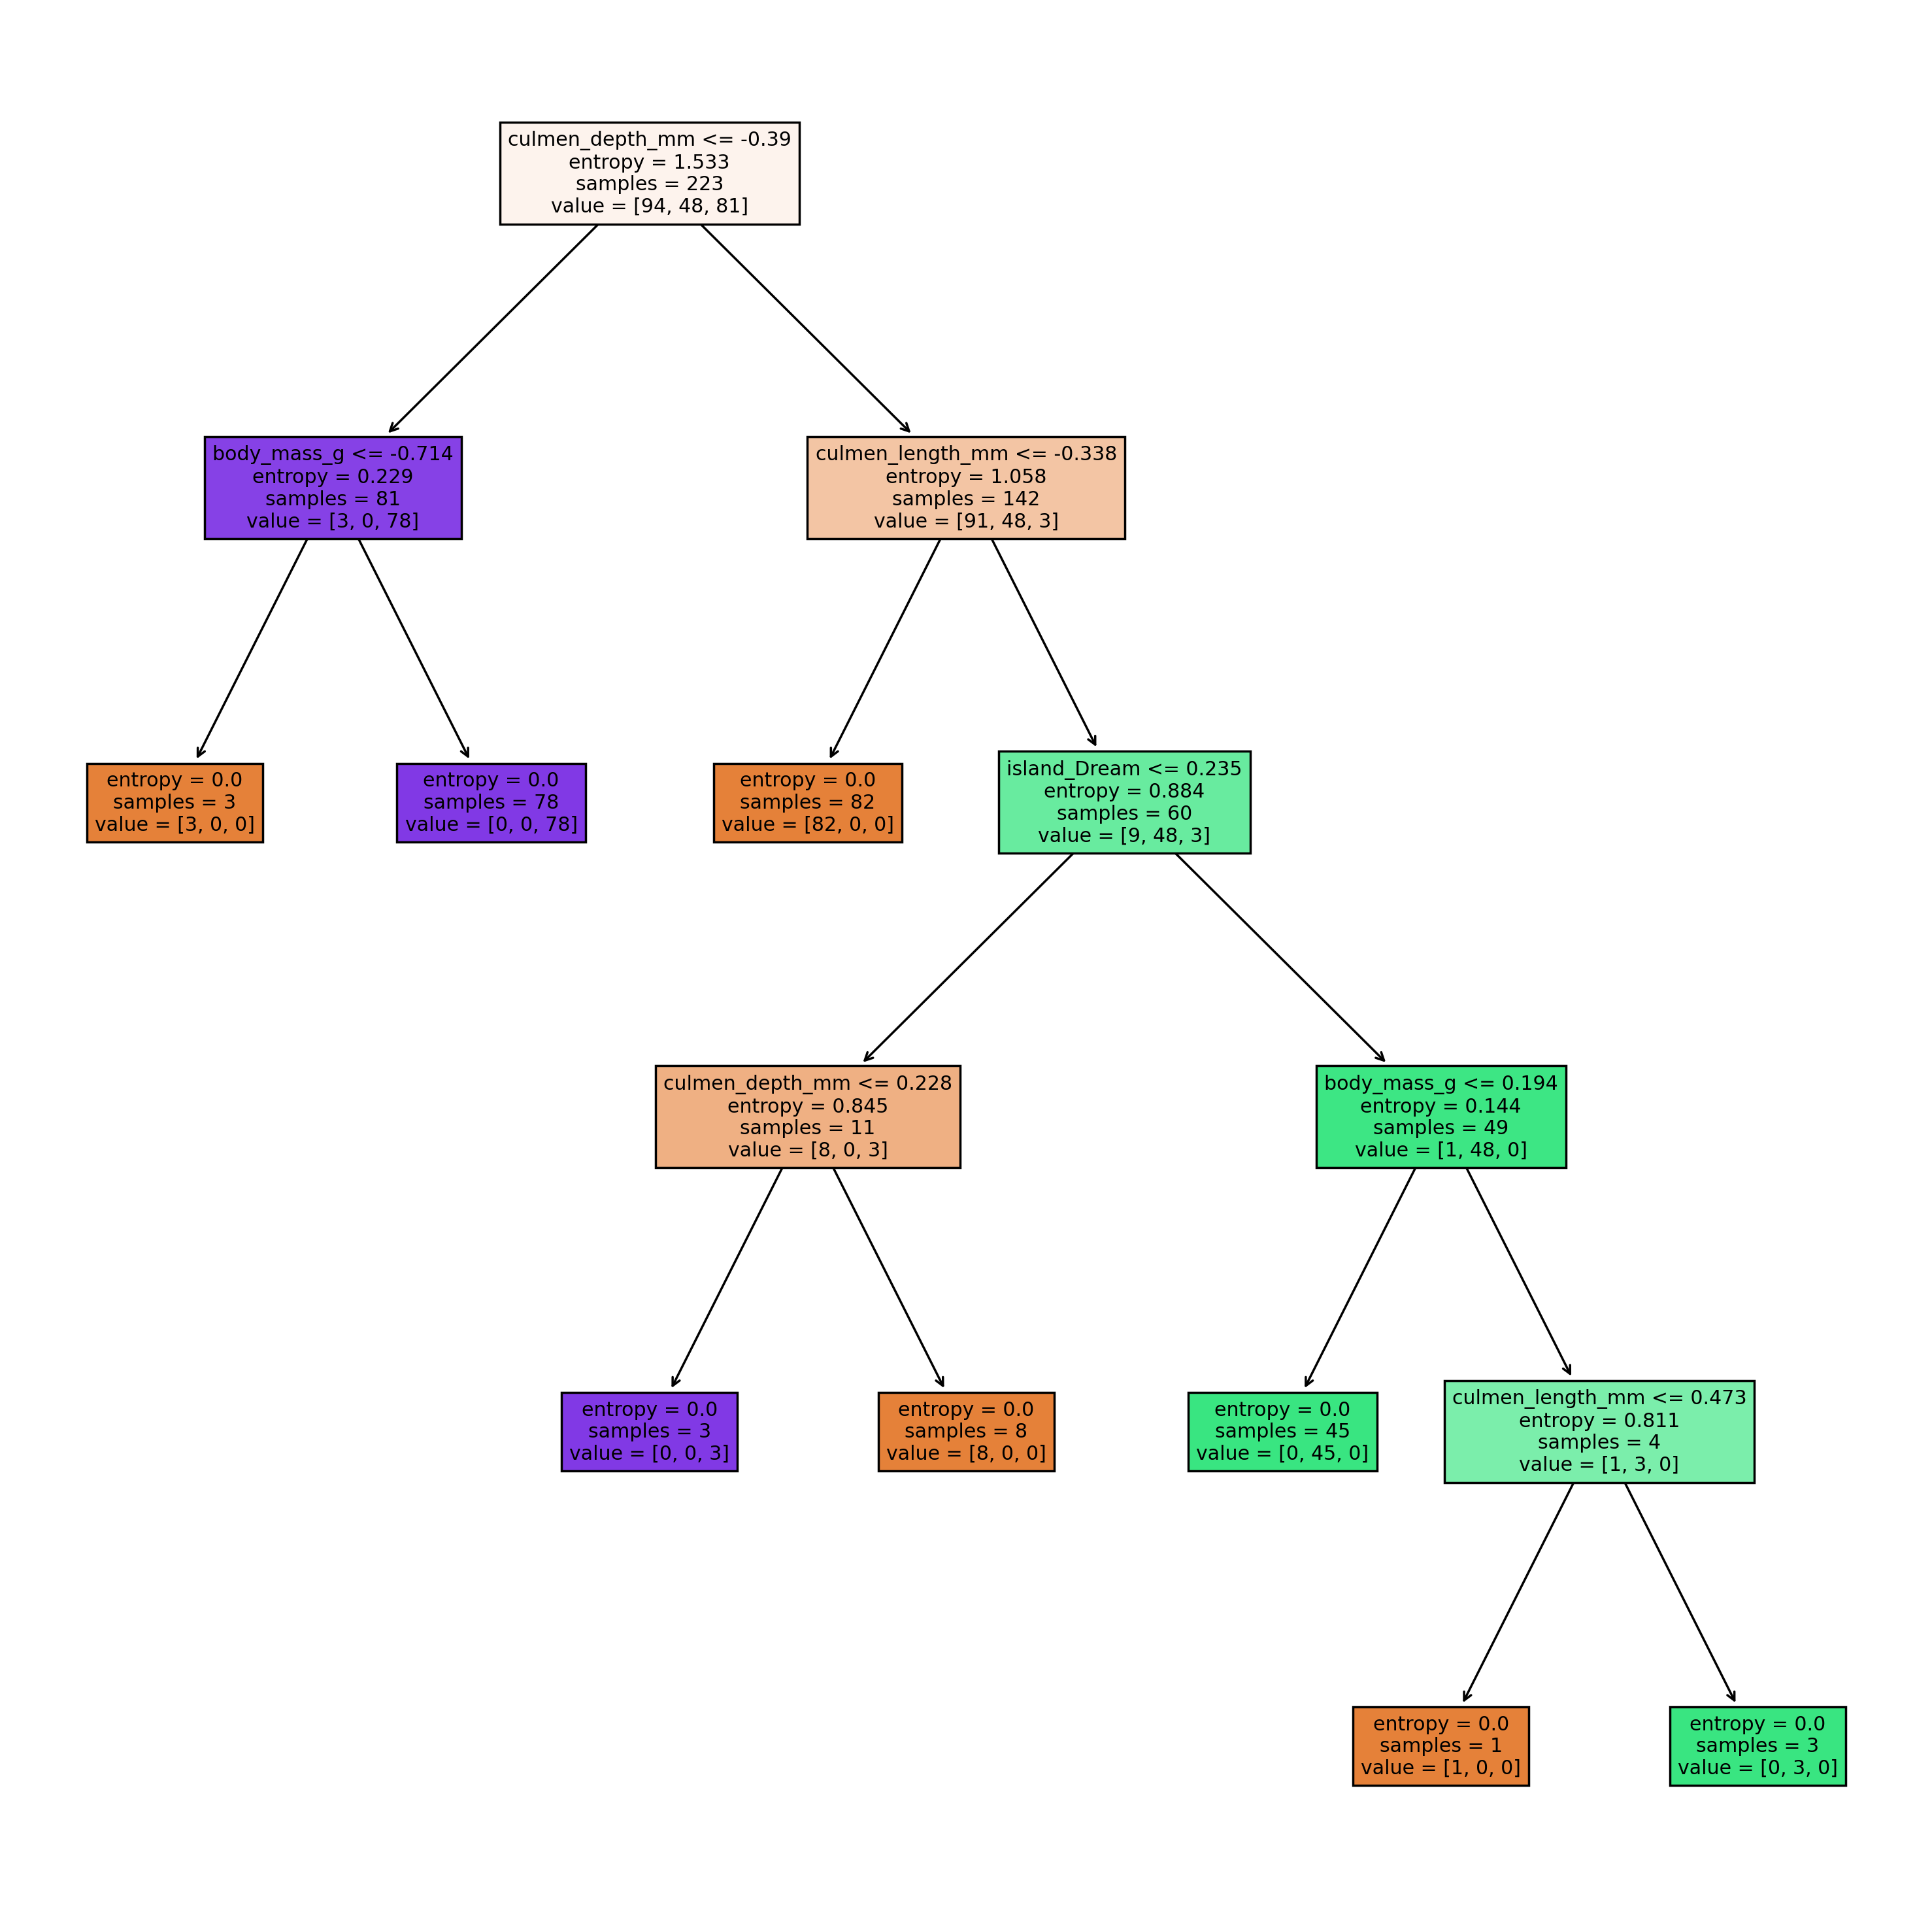

In [70]:
model = DecisionTreeClassifier( criterion= "entropy")
report_model(model)